**Computational Drug Discovery - Regression Models with Random Forest**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import files
uploaded = files.upload()

Saving acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv to acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv


In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


**Input features**

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Output Features**

In [5]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [6]:
X.shape

(4695, 881)

In [7]:
Y.shape

(4695,)

**Remove low variance features**

In [21]:
#Remove Low Variance Features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(4695, 137)

**Data split (80/20 ratio)**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [12]:
X_test.shape, Y_test.shape

((939, 137), (939,))

**Regression Model Using Random Forest**

In [13]:
np.random.seed(100)
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4985040243227148

In [14]:
Y_pred = model.predict(X_train)

**Scatter Plot Showing the Experimental vs Predicted pIC50 values**

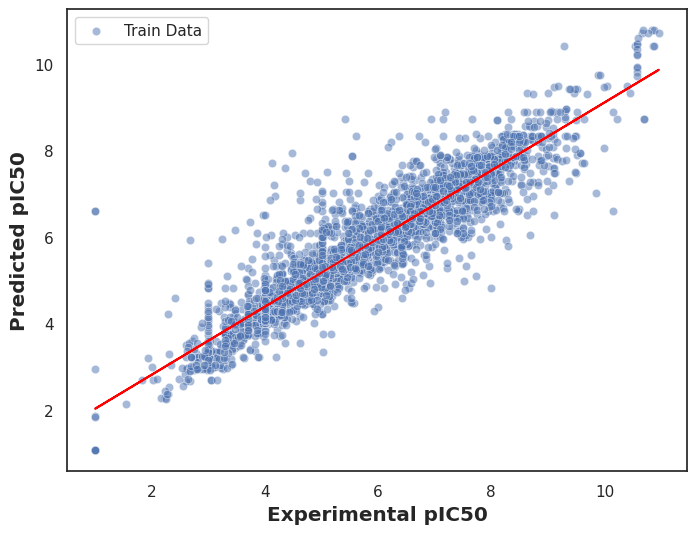

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color codes for Seaborn
sns.set(color_codes=True)
sns.set_style("white")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_train, y=Y_pred, label='Train Data', alpha=0.5)
# Calculate and plot the regression line (slope)
slope = np.polyfit(Y_train, Y_pred, 1)
plt.plot(Y_train, slope[0] * Y_train + slope[1], color='red', label=f'Regression Line (Slope={slope[0]:.2f})')
plt.xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
plt.ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.show()


**Comparing Machine Learning Algorithm for building regression model for acetylcholinesterase**

In [19]:
! pip install lazypredict

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [33]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_train, Y_test, Y_train)


100%|██████████| 42/42 [00:01<00:00, 28.31it/s]


In [34]:
# Performance table of the training set (80% subset)
predictions_train


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.87,0.87,0.55,0.15
ExtraTreeRegressor,0.87,0.87,0.55,0.16
ExtraTreesRegressor,0.87,0.87,0.55,6.47
GaussianProcessRegressor,0.87,0.87,0.55,6.66
XGBRegressor,0.83,0.84,0.62,0.38
RandomForestRegressor,0.83,0.84,0.62,4.34
BaggingRegressor,0.82,0.83,0.65,0.76
MLPRegressor,0.80,0.81,0.68,20.95
HistGradientBoostingRegressor,0.69,0.70,0.84,1.29


In [35]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.43,0.52,1.09,0.34
HistGradientBoostingRegressor,0.43,0.51,1.10,3.03
RandomForestRegressor,0.41,0.50,1.12,5.11
NuSVR,0.39,0.48,1.13,1.61
SVR,0.39,0.48,1.14,2.08
XGBRegressor,0.36,0.46,1.16,0.31
BaggingRegressor,0.35,0.45,1.17,0.47
MLPRegressor,0.35,0.44,1.17,8.33
KNeighborsRegressor,0.35,0.44,1.17,0.12


**Data Visualization of Model Performance**

[(0.0, 1.0)]

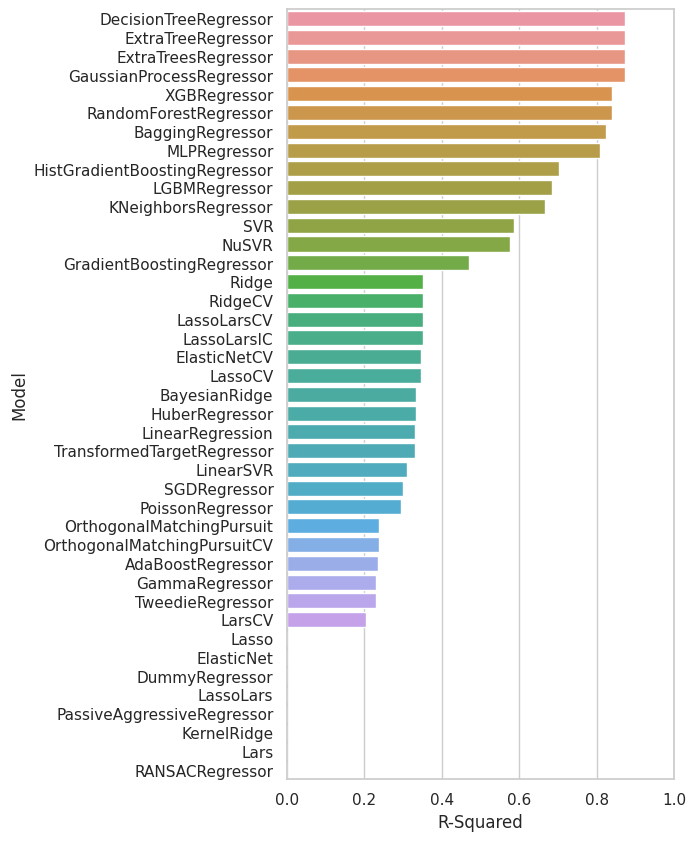

In [26]:
#BarPlot of R-squared
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

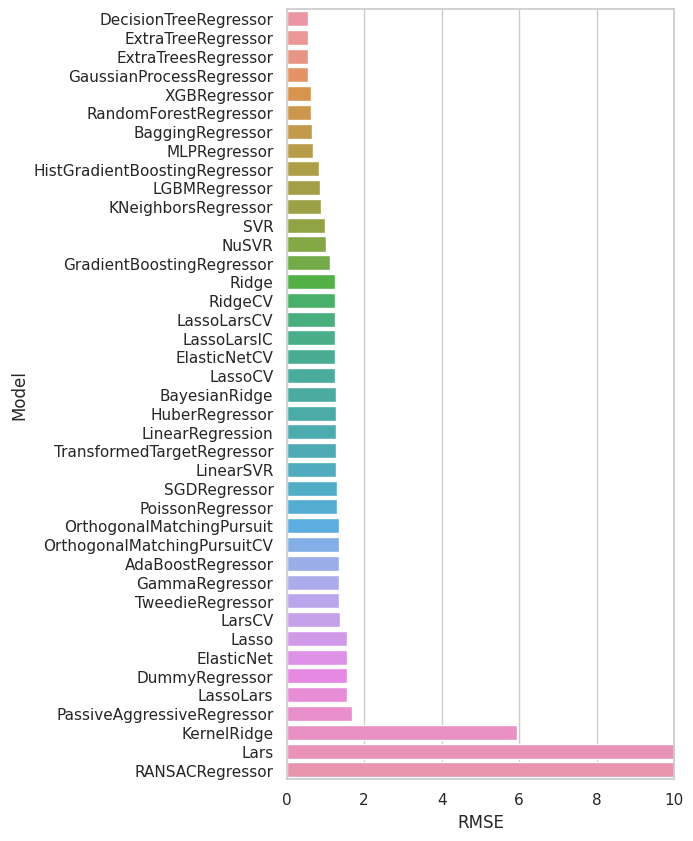

In [28]:
#BarPlot of RMSE value
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

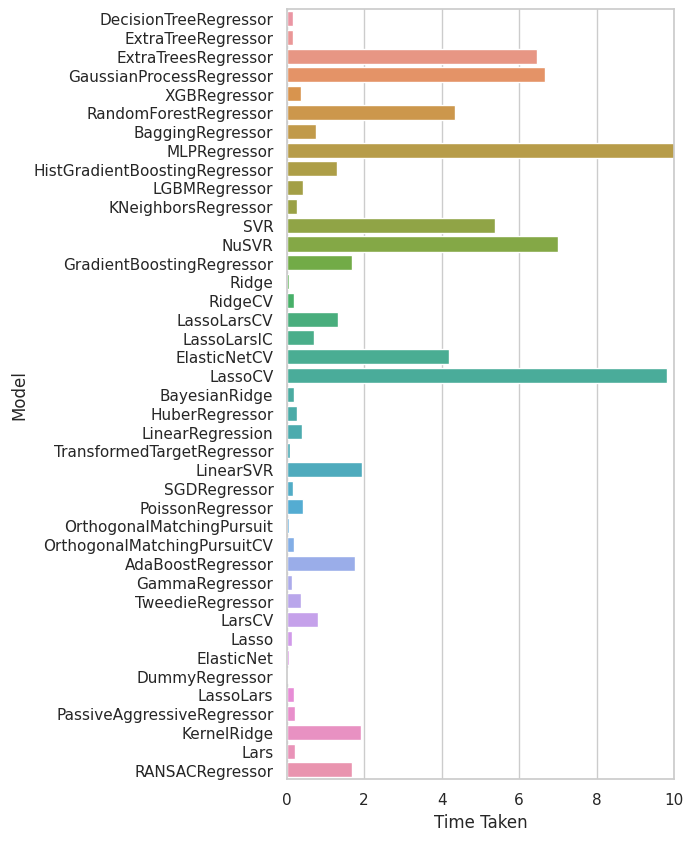

In [29]:
#BarPlot of total time taken
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))